<a href="https://colab.research.google.com/github/ciceroed/CAN/blob/main/Exerc%C3%ADcios%20-%20Cap%C3%ADtulo%206/Cap_6_Exercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. O problema do circuito com diodo apresentado no capÌtulo 4 pode ser
equacionado por um sistema não linear da seguinte forma:

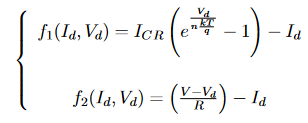

onde Id é a corrente no diodo e Vd é a tensão no diodo. Admitindo um
diodo 1N4001 com IC R = 31,9824 nA, n = 2, k = 1,3806 x 10-23
J/K, T = 300K (26,85 ◦C) e q = 1,6022 x 1019 C, encontre Id e Vd.

In [20]:
# Calculando as derivadas:

import sympy as sp

# Definir a variável simbólica
Id, Vd, Icr, n, k, T, q, V, R = sp.symbols('Id Vd Icr n k T q V R')

# Definir a função simbólica
f1 = Icr*(sp.exp(Vd/((n*k*T)/q))-1) - Id # Exemplo de função
f2 = ((V-Vd)/R) - Id

variaveis = [Id, Vd]
funcoes = [f1, f2]


# Calcular a derivada
derivadas = [[sp.diff(eq, var) for var in variaveis] for eq in funcoes]

# Imprimir a derivada
print("Derivadas:")
for i, eq in enumerate(funcoes):
    for j, var in enumerate(variaveis):
        print(f"d({eq})/d({var}) = {derivadas[i][j]}")


Derivadas:
d(Icr*(exp(Vd*q/(T*k*n)) - 1) - Id)/d(Id) = -1
d(Icr*(exp(Vd*q/(T*k*n)) - 1) - Id)/d(Vd) = Icr*q*exp(Vd*q/(T*k*n))/(T*k*n)
d(-Id + (V - Vd)/R)/d(Id) = -1
d(-Id + (V - Vd)/R)/d(Vd) = -1/R


In [26]:
# Cálculo numérico para engenharia elétrica com PYTHON
# Capítulo 6: Sistemas Não Lineares
# Método iterativo: Newton-Raphson


from math import pi, exp
from numpy import array, divide, linalg

# Definindo as constantes
Icr = 31.9824 * 10 **(-9)
n = 2
k = 1.3806 * 10 **(-23)
T = 300
q = 1.6022 * 10 **(-19)
R = 10
V = 24

x = array([[1.0],[2.0]])  # aproximações iniciais
iter = 0
maxit = 50  # Número máximo de iterações
es = 0.001 # Critério de parada

while True:
  f1 = Icr*(exp(x[0]/(n*k*T/q))-1) - x[1]
  f2 = ((V-x[0])/R) - x[1]
  F = array([f1,f2])  # Matriz de funções

  J = array([[(Icr*q*exp(x[0]*q/(T*k*n)))/(T*k*n), -1],
              [-1/R, -1]])  # Matriz Jacobiana
  dx = linalg.lstsq(J,F,rcond=None)[0]
  x = x - dx
  iter += 1
  ea = max(abs(divide(dx,x)))
  if iter >= maxit or ea <= es:
    break
print(f'Com {iter} iterações: \n x = \n {x}')


Com 4 iterações: 
 x = 
 [[0.93547575]
 [2.30645243]]


$ V_{d} = 0.93547575 \\
  I_{d} = 2.30645243 $